In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model, layers
import matplotlib.pyplot as plt
import PIL
import os
import cv2

In [5]:
image_folder = "Images"
images = []

for file in os.listdir(image_folder):
    img_path = os.path.join(image_folder, file)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (256,256))
    img = img / 255.0
    images.append(img)

images = np.array(images)
print("Total images:", images.shape)

Total images: (5, 256, 256, 3)


In [3]:
def build_model(activation = 'relu'):
    inputs = layers.Input(shape=(256,256,3))
    
    # 5 Conv Blocks
    x = layers.Conv2D(32, (3,3), padding='same', activation='relu')(inputs)
    x = layers.Conv2D(32, (3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(32, (3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(32, (3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(32, (3,3), padding='same', activation='relu')(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(64)(x)
    
    if activation == 'relu':
        x = layers.ReLU()(x)
    elif activation == 'leakyRelu':
        x = layers.LeakyReLU(alpha=0.01)(x)
    elif activation == 'tanh':
        x = layers.Activation("tanh")(x)
        
    model = Model(inputs, x)
    return model

In [6]:
model_relu = build_model("relu")
model_leaky = build_model("leakyRelu")
model_tanh = build_model("tanh")


output_relu = model_relu.predict(images)
output_leaky = model_leaky.predict(images)
output_tanh = model_tanh.predict(images)

c:\Users\Vivekananda Katakam\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


In [7]:
print("ReLU range:", output_relu.min(), output_relu.max())
print("Leaky ReLU range:", output_leaky.min(), output_leaky.max())
print("Tanh range:", output_tanh.min(), output_tanh.max())


ReLU range: 0.0 0.11068373
Leaky ReLU range: -0.0009644527 0.14185874
Tanh range: -0.08569624 0.09418425


In [10]:
def visualize_feature_maps(model, image):

    layer_outputs = [layer.output for layer in model.layers if isinstance(layer, layers.Conv2D)]
    feature_model = Model(inputs=model.input, outputs=layer_outputs)
    
    feature_maps = feature_model.predict(np.expand_dims(image, axis=0))
    
    for i, fmap in enumerate(feature_maps):
        plt.figure(figsize=(10,4))
        plt.title(f"Feature Maps after Conv Block {i+1}")
        
        for j in range(6):
            plt.subplot(2,3,j+1)
            plt.imshow(fmap[0,:,:,j], cmap='gray')
            plt.axis('off')
        
        plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


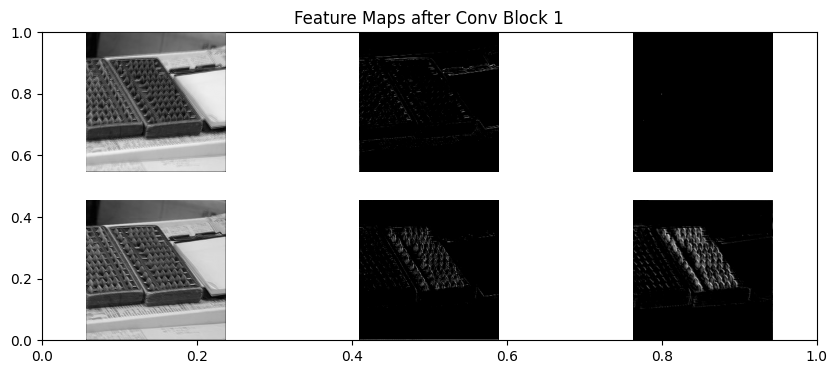

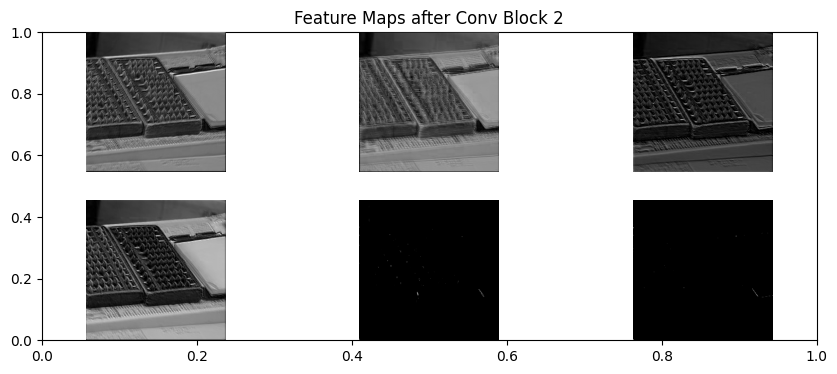

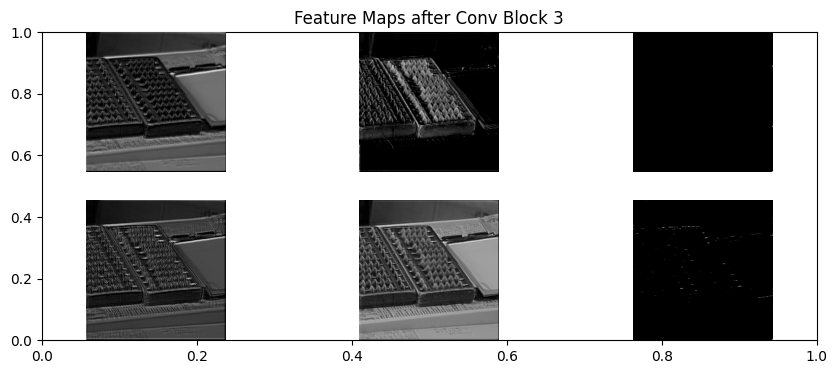

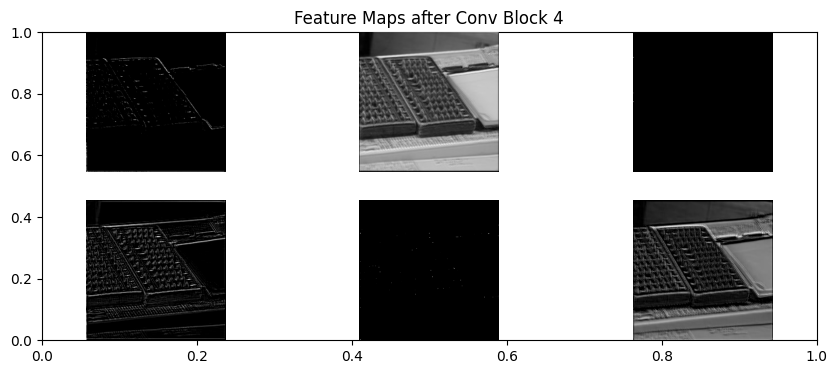

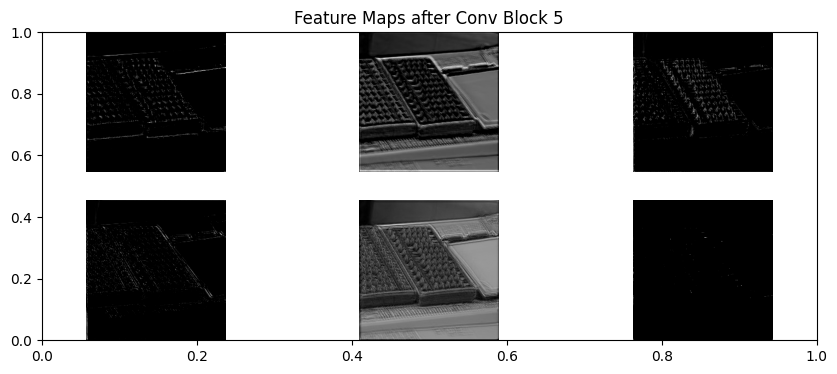

In [11]:
visualize_feature_maps(model_relu, images[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


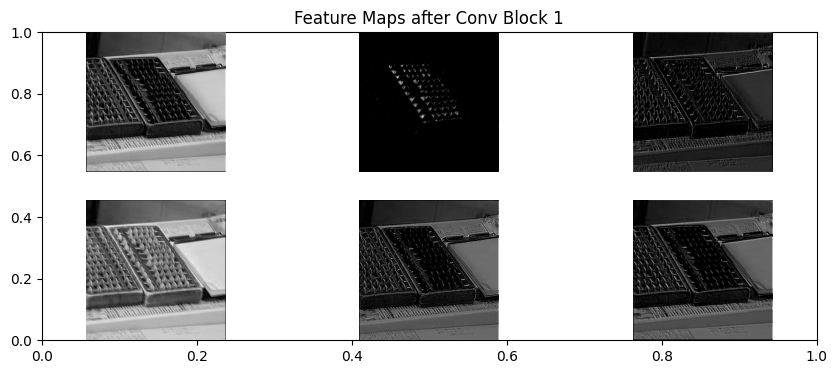

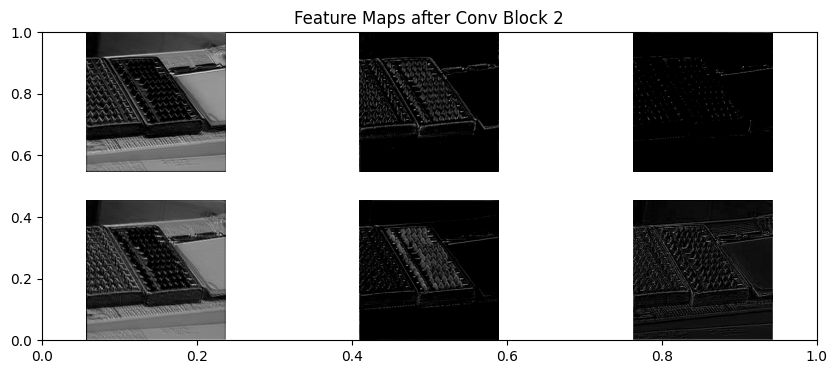

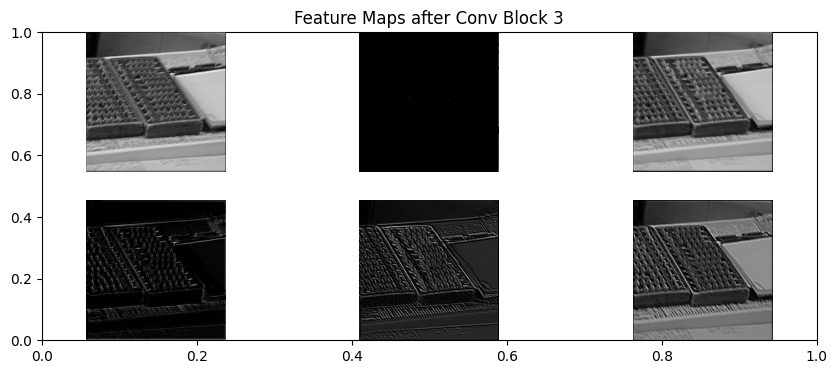

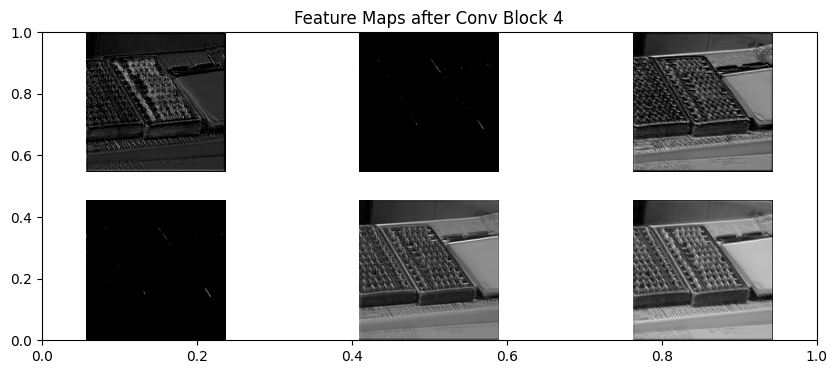

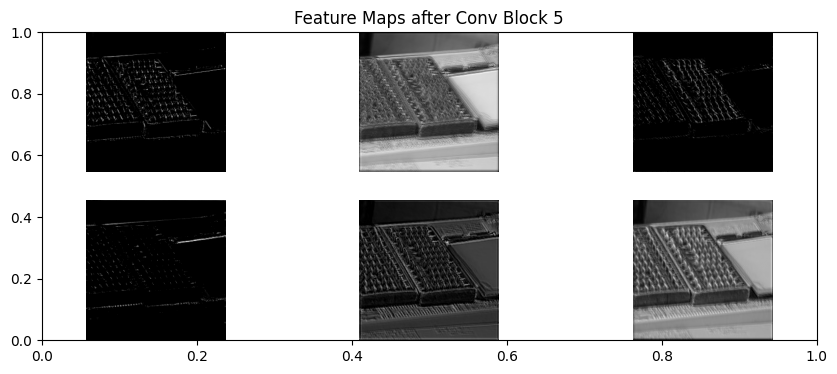

In [12]:
visualize_feature_maps(model_leaky, images[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


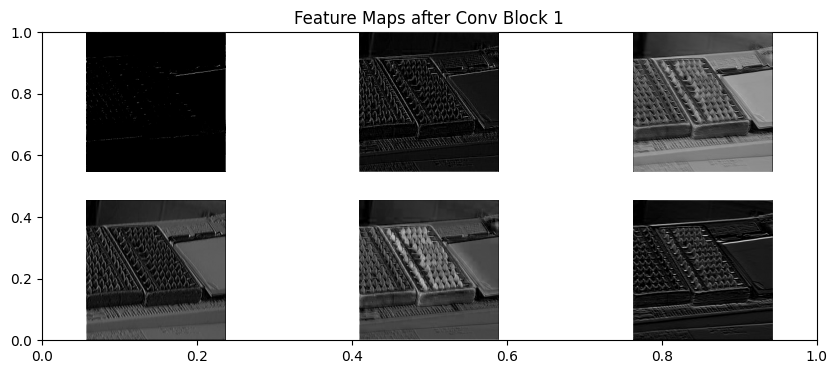

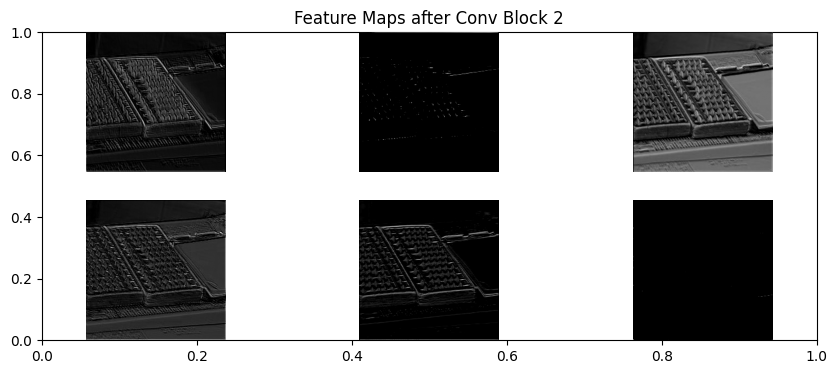

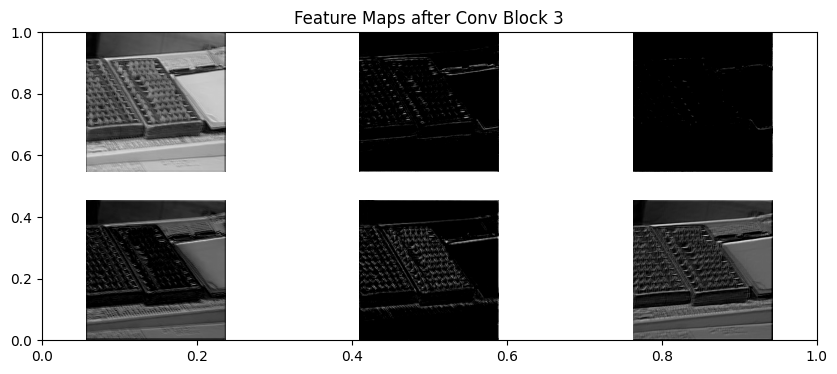

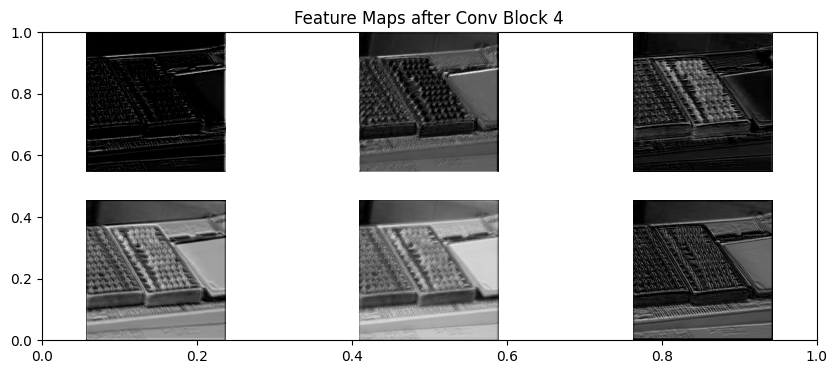

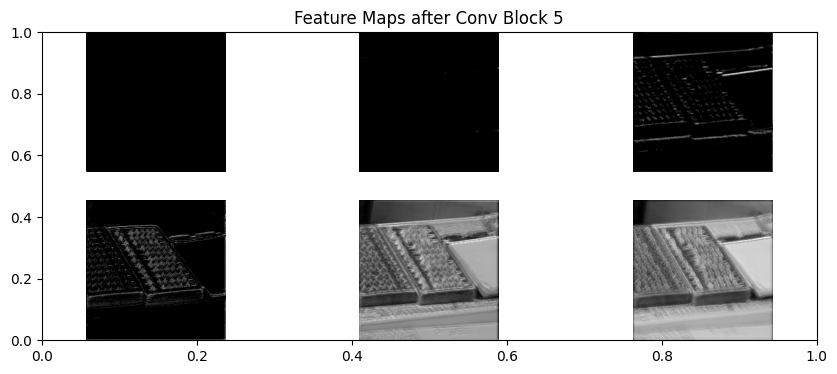

In [13]:
visualize_feature_maps(model_tanh, images[0])
